## Problem statement

**Quantifying the Impact of Mining-Related PM2.5 Air Pollution on Public Health and Identifying High-Risk Communities in South Africa for Targeted Interventions**


*In South Africa, annual mean PM2.5 concentrations typically range from 10-30 μg m-3. Consequently, many South Africans are exposed to PM2.5 concentrations which exceed the annual average concentration guidelines of the national government (20 μg m-3) and World Health Organisation (5 μg m-3). Overall,  PM2.5 contributes to approximately 25,800 premature deaths each year in South Africa. These premature deaths, combined with other non-fatal illnesses caused by PM2.5, cost the South African economy USD 15 billion each year, which is equivalent to ZAR 250 billion and  5.2% of the country’s Gross Domestic Product.*
https://energyandcleanair.org/publication/air-quality-impacts-of-the-new-largo-coal-mine/


*Air pollution accounted for some 3,365 deaths of children under five years across South Africa in 2021.https://www.unicef.org/southafrica/press-releases/air-pollution-accounted-some-3365-deaths-children-under-five-years-across-south*


In [1]:
import numpy as np
import pandas as pd

c:\Users\pales\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', 100)

Data analysis

In [11]:
#data reading
air_data=pd.read_csv('air_pollution_indicators_zaf.csv')
mine_data=pd.read_excel("Global-Coal-Mine-Tracker-April-2024.xlsx",sheet_name=1)
facilities_data=pd.read_csv('health_system_za_hospitals_v1.csv')
cities_data=pd.read_csv('za_cities_predictions.csv')

In [12]:
#air data
air_data.head()

GHO (CODE)  \
0                     #indicator+code   
1  PHE_HHAIR_PROP_POP_POLLUTING_FUELS   
2                           SDGPOISON   
3                              AIR_17   
4   PHE_HHAIR_PROP_POP_CATEGORY_FUELS   

                                       GHO (DISPLAY)  \
0                                    #indicator+name   
1  Proportion of population with primary reliance...   
2  Mortality rate attributed to unintentional poi...   
3  Household air pollution attributable DALYs (pe...   
4  Proportion of population with primary reliance...   

                                           GHO (URL) YEAR (DISPLAY)  \
0                                     #indicator+url     #date+year   
1  https://www.who.int/data/gho/data/indicators/i...           1996   
2  https://www.who.int/data/gho/data/indicators/i...           2018   
3  https://www.who.int/data/gho/data/indicators/i...           2019   
4  https://www.who.int/data/gho/data/indicators/i...           2016   

          STARTYEAR         ENDYEAR REGION (CODE) REGION (DISPLAY)  \
0  #date+year+start  #date+year+end  #region+code     #region+name   
1              1996            1996           AFR           Africa   
2              2018            2018           AFR           Africa   
3              2019            2019           AFR           Africa   
4              2016            2016           AFR           Africa   

  COUNTRY (CODE) COUNTRY (DISPLAY)   DIMENSION (TYPE)        DIMENSION (CODE)  \
0  #country+code     #country+name    #dimension+type         #dimension+code   
1            ZAF      South Africa  RESIDENCEAREATYPE  RESIDENCEAREATYPE_TOTL   
2            ZAF      South Africa                SEX                SEX_BTSX   
3            ZAF      South Africa                SEX                 SEX_MLE   
4            ZAF      South Africa  RESIDENCEAREATYPE   RESIDENCEAREATYPE_URB   

  DIMENSION (NAME)               Numeric             Value  \
0  #dimension+name  #indicator+value+num  #indicator+value   
1            Total                  50.3  50.3 [41 - 59.6]   
2       Both sexes               1.72469     1.7 [1.0-2.7]   
3             Male              518.1187     518 [253-834]   
4            Urban                   4.6  4.6 [0.4 - 14.8]   

                    Low                   High  
0  #indicator+value+low  #indicator+value+high  
1                  41.0                   59.6  
2               0.99762                2.71837  
3             252.69897              834.24987  
4                   0.4                   14.8

In [13]:
mine_data.head()

GEM Mine ID  MSHA ID      Country              Mine Name  \
0       M0001      NaN  Afghanistan    Shadashak Coal Mine   
1       M0002      NaN    Australia        Airly Coal Mine   
2       M0004      NaN    Australia  Angus Place Coal Mine   
3       M0004      NaN    Australia  Angus Place Coal Mine   
4       M0005      NaN    Australia        Appin Coal Mine   

                                      Mine Name AKAs Mine Name (Non-ENG)  \
0                                                NaN                 NaN   
1                                                NaN                 NaN   
2         Angus Place Mine Extension Project (MPMEP)                 NaN   
3                                                NaN                 NaN   
4  West Cliff, Tower Colliery, Appin North, Appin...                 NaN   

                               GEM Wiki URLs      Status  \
0   https://www.gem.wiki/Shadashak_Coal_Mine   Operating   
1            https://www.gem.wiki/Airly_Mine   Operating   
2  https://www.gem.wiki/Angus_Place_Colliery   Cancelled   
3  https://www.gem.wiki/Angus_Place_Colliery  Mothballed   
4            https://www.gem.wiki/Appin_mine   Operating   

          Status Detail Project Type  ... Location Accuracy  \
0                   NaN          NaN  ...       Approximate   
1                   NaN          NaN  ...             Exact   
2             Announced    Expansion  ...             Exact   
3  Care and Maintenance          NaN  ...             Exact   
4                   NaN          NaN  ...             Exact   

  Primary Consumer, Destination Coal Plant, Steel Plant, Terminal  \
0                           NaN                               NaN   
1                    Coal Plant         Mount Piper power station   
2                           NaN                               NaN   
3                           NaN                               NaN   
4             Terminal (Export)         Port Kembla Coal Terminal   

       Coal Plant, Steel Plant, Terminal GEM Wiki  \
0                                             NaN   
1  https://www.gem.wiki/Mount_Piper_power_station   
2                                             NaN   
3                                             NaN   
4  https://www.gem.wiki/Port_Kembla_Coal_Terminal   

  Reported Coal Mine Methane Emissions (thousand tonnes  CO2e)  \
0                                                NaN             
1                                              0.030             
2                                                NaN             
3                                              0.539             
4                                                NaN             

  Year of Reported Coal Mine Methane Emissions  \
0                                          NaN   
1                                       2022.0   
2                                          NaN   
3                                       2022.0   
4                                          NaN   

  GEM Coal Mine Methane Emissions Estimate (MCM/yr)  \
0                                              24.1   
1                                              25.8   
2                                              21.6   
3                                                 0   
4                                              89.2   

  GEM Coal Mine Methane Emissions Estimate (M tonnes/yr)  \
0                                              0.016       
1                                              0.017       
2                                              0.014       
3                                                  0       
4                                               0.06       

   CMM Emissions (CO2e 20 years) CMM Emissions (CO2e 100 years)  
0                            1.3                            0.5  
1                            1.4                            0.5  
2                            1.2                            0.4  
3                              0            

In [14]:
facilities_data.head()

Name       Long      Lat              Category  \
0        Fort England Hospital   26.54361 -33.3156  Specialised Hospital   
1       Fort Beaufort Hospital  26.633571 -32.7802     District Hospital   
2              Bhisho Hospital   27.45516 -32.8277     District Hospital   
3                Grey Hospital   27.39579 -32.8793     District Hospital   
4  St Francis Chronic Hospital   26.69921 -30.6887     District Hospital   

       Province                                District  \
0  Eastern Cape    Sarah Baartman District Municipality   
1  Eastern Cape          Amathole District Municipality   
2  Eastern Cape  Buffalo City Metropolitan Municipality   
3  Eastern Cape  Buffalo City Metropolitan Municipality   
4  Eastern Cape         Joe Gqabi District Municipality   

                         Subdistrict  \
0          Makana Local Municipality   
1  Raymond Mhlaba Local Municipality   
2          Buffalo City Sub-District   
3          Buffalo City Sub-District   
4   Walter Sisulu Local Municipality   

  Uses DATCOV19 surveillance online platform  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

                   Main Health care Services Offered   Size  ...  \
0               Psychiatry and Occupational Services  Large  ...   
1  Surgical Services,Medical Services, Paediatric...    NaN  ...   
2  Anti-Retroviral Treatment Services (ARVs), Eme...    NaN  ...   
3  Emergency department, Paediatric ward, Materni...    NaN  ...   
4  The hospital services include Pharmacy, Anti-R...    NaN  ...   

   Beds Surgical Approved  Surgeons Qualified  Surgeons_unqualified  Theatres  \
0                     NaN                 NaN                   NaN       NaN   
1                    15.0                 0.0                   2.0       1.0   
2                    40.0                 0.0                   3.0       2.0   
3                    18.0                 0.0                   4.0       1.0   
4                     0.0                 0.0                   0.0       0.0   

   Total number of beds  Total number of staff  Cluster  \
0                 313.0                    NaN      NaN   
1                   NaN                    NaN      NaN   
2                   NaN                    NaN      NaN   
3                   NaN                    NaN      NaN   
4                   NaN                    NaN      NaN   

                                             Webpage  Geo_subdivision  \
0  http://doctors-hospitals-medical-cape-town-sou...            ZA-EC   
1  http://doctors-hospitals-medical-cape-town-sou...            ZA-EC   
2  http://doctors-hospitals-medical-cape-town-sou...            ZA-EC   
3  http://doctors-hospitals-medical-cape-town-sou...            ZA-EC   
4  http://doctors-hospitals-medical-cape-town-sou...            ZA-EC   

  Is Vaccination site  
0                 NaN  
1                 YES  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 23 columns]

In [15]:
cities_data.head()

City        Date        Lat       Long  Predicted_PM25  \
0  Johannesburg  2019-01-01 -26.205171  28.049815       54.230453   
1  Johannesburg  2019-01-02 -26.205171  28.049815       55.092041   
2  Johannesburg  2019-01-03 -26.205171  28.049815       50.152136   
3  Johannesburg  2019-01-04 -26.205171  28.049815       49.554493   
4  Johannesburg  2019-01-05 -26.205171  28.049815       50.136486   

   pop_density2010_5000_max  
0                4153.27832  
1                4153.27832  
2                4153.27832  
3                4153.27832  
4                4153.27832

### Exploratory data analysis

Below is the detailed analysis for the mining dataset

In [17]:
mine_data.shape

(5226, 52)

In [18]:
mine_data.info

<bound method DataFrame.info of      GEM Mine ID    MSHA ID        Country                       Mine Name  \
0          M0001        NaN    Afghanistan             Shadashak Coal Mine   
1          M0002        NaN      Australia                 Airly Coal Mine   
2          M0004        NaN      Australia           Angus Place Coal Mine   
3          M0004        NaN      Australia           Angus Place Coal Mine   
4          M0005        NaN      Australia                 Appin Coal Mine   
...          ...        ...            ...                             ...   
5221       M5571        NaN       Bulgaria                 Stanyantsi Mine   
5222       M5572        NaN          China            Xinyuan UG Coal Mine   
5223       M5573  1103147.0  United States  Prairie Eagle Underground Mine   
5224       M5574        NaN          China            Beishan Surface Mine   
5225       M5575        NaN          China        Ningxia Hui'an Coal Mine   

                               

Since the data contains global mines we need to tailor it to only south africans mines in order for it to remain constant

In [20]:
south_africa_data = mine_data[mine_data['Country'] == 'South Africa']

In [21]:
south_africa_data.head()

GEM Mine ID  MSHA ID       Country                  Mine Name  \
895       M0885      NaN  South Africa     Alexander Coal Project   
896       M0886      NaN  South Africa          Belfast Coal Mine   
897       M0886      NaN  South Africa          Belfast Coal Mine   
898       M0887      NaN  South Africa  Berenice-Cygnus Coal Mine   
899       M0888      NaN  South Africa           Umzila Coal Mine   

                                        Mine Name AKAs Mine Name (Non-ENG)  \
895                                                NaN                 NaN   
896                    Belfast Expansion Project (BEP)                 NaN   
897               Belfast Implementation Project (BIP)                 NaN   
898  Berenice Project, Universal Coal Development I...                 NaN   
899                                         Birmingham                 NaN   

                                      GEM Wiki URLs     Status Status Detail  \
895     https://www.gem.wiki/Alexander_Coal_Project   Proposed    Pre-Permit   
896          https://www.gem.wiki/Belfast_coal_mine  Cancelled   Exploration   
897          https://www.gem.wiki/Belfast_coal_mine  Operating           NaN   
898  https://www.gem.wiki/Berenice-Cygnus_Coal_Mine   Proposed    Pre-Permit   
899           https://www.gem.wiki/Umzila_Coal_Mine   Proposed    Pre-Permit   

    Project Type  ... Location Accuracy Primary Consumer, Destination  \
895          New  ...             Exact                           NaN   
896    Expansion  ...             Exact             Terminal (Export)   
897          NaN  ...             Exact             Terminal (Export)   
898          New  ...       Approximate                           NaN   
899          New  ...             Exact                    Coal Plant   

    Coal Plant, Steel Plant, Terminal  \
895                               NaN   
896                               NaN   
897        Richards Bay Coal Terminal   
898                               NaN   
899               Arnot Power Station   

          Coal Plant, Steel Plant, Terminal GEM Wiki  \
895                                              NaN   
896                                              NaN   
897  https://www.gem.wiki/Richards_Bay_Coal_Terminal   
898                                              NaN   
899         https://www.gem.wiki/Arnot_Power_Station   

    Reported Coal Mine Methane Emissions (thousand tonnes  CO2e)  \
895                                                NaN             
896                                                NaN             
897                                                NaN             
898                                                NaN             
899                                                NaN             

    Year of Reported Coal Mine Methane Emissions  \
895                                          NaN   
896                                          NaN   
897                                          NaN   
898                                          NaN   
899                                          NaN   

    GEM Coal Mine Methane Emissions Estimate (MCM/yr)  \
895                                                42   
896                                                 -   
897                                               3.2   
898                                              52.5   
899                                              25.3   

    GEM Coal Mine Methane Emissions Estimate (M tonnes/yr)  \
895                                              0.028       
896                                                  -       
897                                              0.002       
898                                              0.035       
899                                              0.017       

     CMM Emissions (CO2e 20 years) CMM Emissions (CO2e 100 years)  
895                            2.3                            0.8  
896                              -        

In [22]:
south_africa_data.shape

(137, 52)

We can see that there are about 137 mines in south africa now we need to look for the mines that are still active

In [24]:
south_africa_data['Status'].value_counts()

Status
Operating     79
Proposed      36
Mothballed    13
Cancelled      6
Shelved        3
Name: count, dtype: int64

from the above we can see that about only 79 of the 137 mines are operating which will be our main target

In [25]:
operating_mines = south_africa_data[south_africa_data['Status'] == 'Operating']


In [31]:
operating_mines.head()

GEM Mine ID  MSHA ID       Country               Mine Name  \
897       M0886      NaN  South Africa       Belfast Coal Mine   
902       M0891      NaN  South Africa  Bosjesspruit Coal Mine   
904       M0893      NaN  South Africa  Gugulethu Coal Project   
906       M0895      NaN  South Africa      Katlego Operations   
907       M0896      NaN  South Africa     Goedehoop Coal Mine   

                                        Mine Name AKAs Mine Name (Non-ENG)  \
897               Belfast Implementation Project (BIP)                 NaN   
902     Bosjesspruit Irenedale, Secunda Mining Complex                 NaN   
904                            De Wittekrans Coal Mine                 NaN   
906  Dorstfontein, Forzando North, South, Tumelo, E...                 NaN   
907                                   Vlaklaagte, Bank                 NaN   

                                    GEM Wiki URLs     Status Status Detail  \
897        https://www.gem.wiki/Belfast_coal_mine  Operating           NaN   
902   https://www.gem.wiki/Bosjesspruit_coal_mine  Operating           NaN   
904  https://www.gem.wiki/De_Wittekrans_coal_mine  Operating           NaN   
906       https://www.gem.wiki/Katlego_Operations  Operating           NaN   
907      https://www.gem.wiki/Goedehoop_coal_mine  Operating           NaN   

    Project Type Project Phase                               Owners  \
897          NaN           NaN       Exxaro Coal Mpumalanga Pty Ltd   
902          NaN           NaN                 Sasol Mining Pty Ltd   
904          New           NaN                  Canyon Coal Pty Ltd   
906          NaN           NaN  Overlooked Colliery Proprietary Ltd   
907          NaN           NaN          Thungela Operations Pty Ltd   

    Owners (Non-ENG)                                     Parent Company  \
897                -                      Exxaro Resources Ltd [100.0%]   
902                -                                  Sasol Ltd [89.8%]   
904                -                                              Menar   
906                -         Overlooked Colliery Proprietary Ltd [100%]   
907                -  Thungela Resources Ltd [90.0%]; Nkulo Communit...   

      Company HQs Capacity (Mtpa) Production (Mtpa) Year of Production  \
897  South Africa               *              2.65               2022   
902  South Africa             5.6               5.5               2023   
904  South Africa             3.6                 *                NaN   
906  South Africa               *               4.2                NaN   
907            UK               *              3.22               2022   

     Coal Output (Annual, Mst)              Mine Type    Mining Method  \
897                        NaN                Surface         Open Pit   
902                        NaN            Underground  Bord and Pillar   
904                        NaN  Underground & Surface            Mixed   
906                        NaN  Underground & Surface            Mixed   
907                        NaN            Underground  Bord and Pillar   

    Mine Size (Km2) Mine Depth (m) Depth Accuracy Workforce Size  \
897           58.18             50       Estimate            387   
902               -             80       Estimate           1230   
904               -             60       Estimate            430   
906               -            190          Exact            651   
907               -             80       Estimate            477   

    Workforce Accuracy      Coal Type Coal Grade  \
897           Estimate  Subbituminous    Thermal   
902           Estimate     Bituminous          -   
904              Exact  Subbituminous    Thermal   
906           Estimate     Bituminous    Thermal   
907           Estimate     Bituminous    Thermal   

    Total Reserves (Proven and Probable, Mt) Year of Total Reserves Recorded  \
897                                       37                            2022   
902                

In [32]:
operating_mines['Coal Type'].value_counts()

Coal Type
Bituminous       60
Subbituminous    14
Anthracite        5
Name: count, dtype: int64

Sixty of the mines in South Africa produce Bituminous which has a high impact on pm2.5 pollutant ,this shows that majority of the coal mines in South Africa are the biggest contributors to air pollution

In [35]:
operating_mines.isnull().value_counts()

GEM Mine ID  MSHA ID  Country  Mine Name  Mine Name AKAs  Mine Name (Non-ENG)  GEM Wiki URLs  Status  Status Detail  Project Type  Project Phase  Owners  Owners (Non-ENG)  Parent Company  Company HQs  Capacity (Mtpa)  Production (Mtpa)  Year of Production  Coal Output (Annual, Mst)  Mine Type  Mining Method  Mine Size (Km2)  Mine Depth (m)  Depth Accuracy  Workforce Size  Workforce Accuracy  Coal Type  Coal Grade  Total Reserves (Proven and Probable, Mt)  Year of Total Reserves Recorded  Total Resource (Inferred, Indicated, Measured)  Reserve to Production Ratio (R/P)  Opening Year  Reported Life of Mine  Coalfield  Location  Prefecture, District  State, Province  Subregion  Region  Latitude  Longitude  Location Accuracy  Primary Consumer, Destination  Coal Plant, Steel Plant, Terminal  Coal Plant, Steel Plant, Terminal GEM Wiki  Reported Coal Mine Methane Emissions (thousand tonnes  CO2e)  Year of Reported Coal Mine Methane Emissions  GEM Coal Mine Methane Emissions Estimate (MCM/yr) 

In [37]:
columns_to_keep = ['Mine Name', 'Mine Type', 'Mining Method','Coal Type','Coal Grade','Opening Year','Location','Prefecture, District',
                   'State, Province','Latitude','Longitude','Coal Plant, Steel Plant, Terminal']

# Create a new DataFrame with only the selected columns
df_mines = operating_mines[columns_to_keep]

In [38]:
df_mines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 897 to 4030
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Mine Name                          79 non-null     object
 1   Mine Type                          79 non-null     object
 2   Mining Method                      79 non-null     object
 3   Coal Type                          79 non-null     object
 4   Coal Grade                         79 non-null     object
 5   Opening Year                       79 non-null     object
 6   Location                           57 non-null     object
 7   Prefecture, District               66 non-null     object
 8   State, Province                    79 non-null     object
 9   Latitude                           79 non-null     object
 10  Longitude                          79 non-null     object
 11  Coal Plant, Steel Plant, Terminal  44 non-null     object
dtypes: object(1

from the data information we can see that there are some mines without locations and others do not have terminal plant which will need to be cleaned

City data analysis

In [51]:
cities_data.columns

Index(['City', 'Date', 'Lat', 'Long', 'Predicted_PM25',
       'pop_density2010_5000_max'],
      dtype='object')

In [52]:
cities_data['City'].value_counts()

City
Middelburg      1158
Johannesburg     579
Upington         579
Ulundi           579
Hermanus         579
                ... 
Kroonstad        579
Bethal           579
Grahamstown      579
Bethlehem        579
Mahikeng         579
Name: count, Length: 71, dtype: int64

In [53]:
df=cities_data.copy()

## Data Visualization

<Axes: title={'center': 'Count of Mines by Type'}, xlabel='Mine Type'>

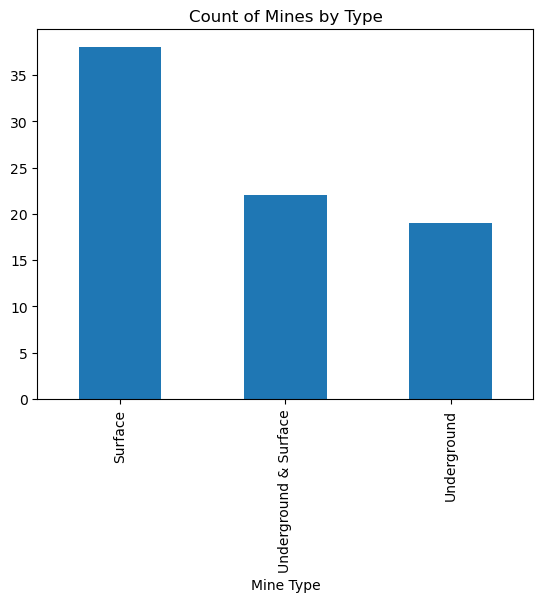

In [39]:
df_mines['Mine Type'].value_counts().plot(kind='bar', title='Count of Mines by Type')


<Axes: title={'center': 'Count of Coal Types'}, xlabel='Coal Type'>

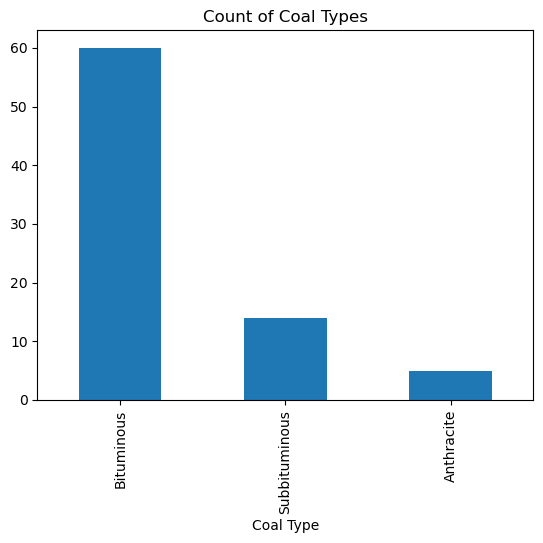

In [40]:
df_mines['Coal Type'].value_counts().plot(kind='bar', title='Count of Coal Types')


<Axes: title={'center': 'Geographical Distribution of Mines'}, xlabel='Longitude', ylabel='Latitude'>

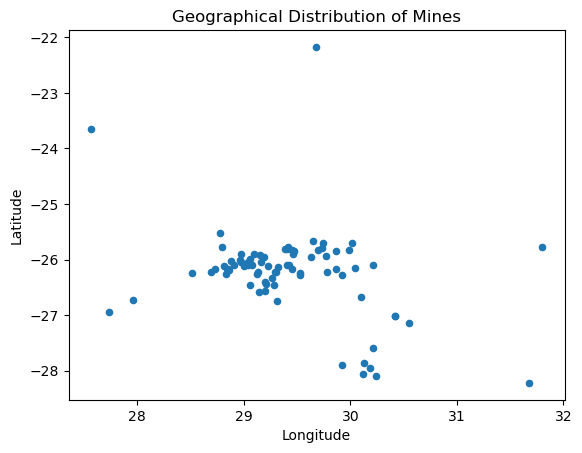

In [41]:
df_mines.plot.scatter(x='Longitude', y='Latitude', title='Geographical Distribution of Mines')


<Axes: title={'center': 'Mine Type by Coal Type'}, xlabel='Mine Type'>

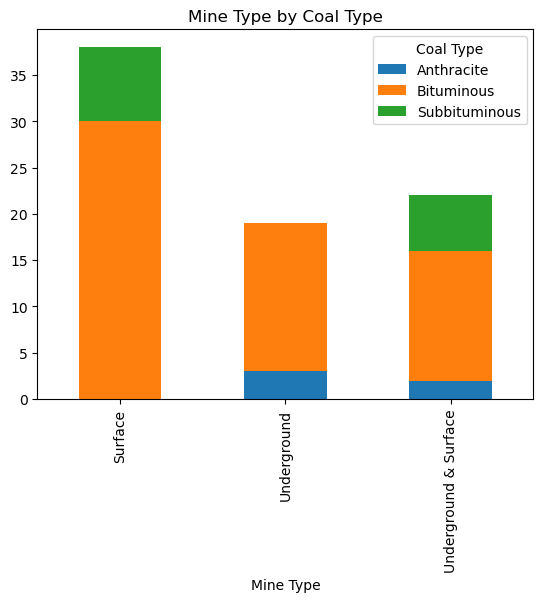

In [43]:
pd.crosstab(df_mines['Mine Type'], df_mines['Coal Type']).plot(kind='bar', stacked=True, title='Mine Type by Coal Type')



<Axes: title={'center': 'Coal Grade Distribution'}, ylabel='count'>

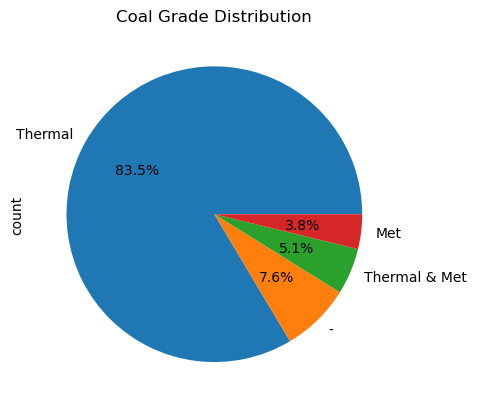

In [44]:
df_mines['Coal Grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Coal Grade Distribution')


<Axes: xlabel='Prefecture, District', ylabel='State, Province'>

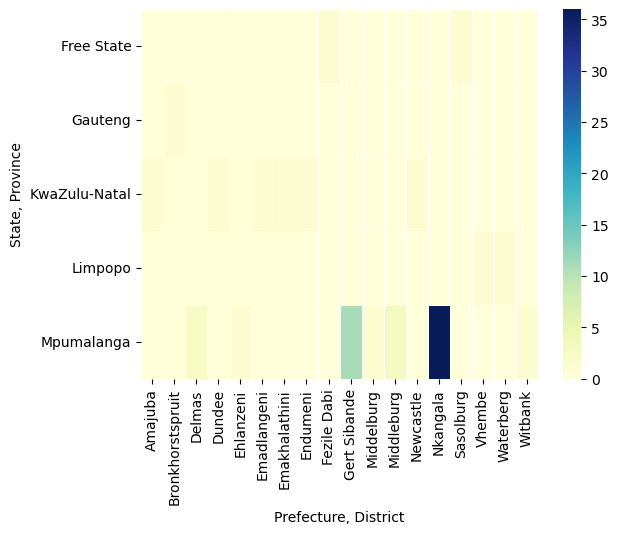

In [45]:
import seaborn as sns
location_heatmap = pd.crosstab(df_mines['State, Province'], df_mines['Prefecture, District'])
sns.heatmap(location_heatmap, cmap="YlGnBu", linewidths=.5)


<Axes: title={'center': 'Trend of Mine Openings Over Time'}, xlabel='Opening Year'>

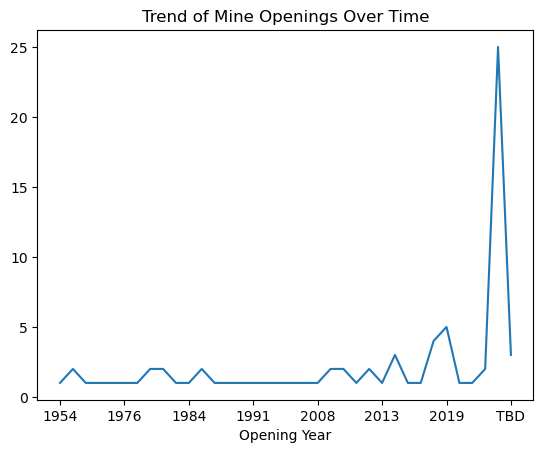

In [46]:
df_mines.groupby('Opening Year').size().plot(kind='line', title='Trend of Mine Openings Over Time')


In [49]:
!pip install folium

import folium

# Create a map centered around a location
map_mines = folium.Map(location=[-30, 24], zoom_start=5)

# Add mine locations
for index, row in df_mines.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Mine Name']).add_to(map_mines)

# Show map
map_mines


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ---------------------------------------- 108.4/108.4 kB 2.1 MB/s eta 0:00:00


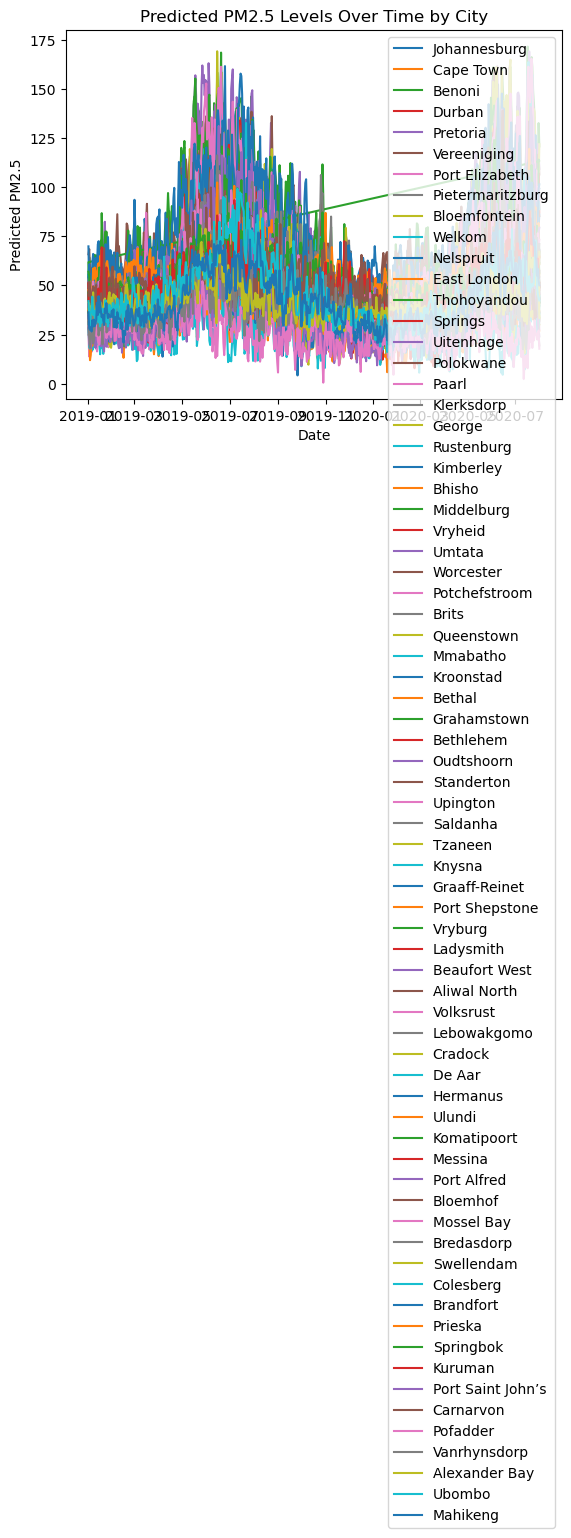

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Date to datetime if not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by City and Date and plot PM2.5 over time
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Predicted_PM25'], label=city)

plt.title('Predicted PM2.5 Levels Over Time by City')
plt.xlabel('Date')
plt.ylabel('Predicted PM2.5')
plt.legend(loc='best')
plt.show()


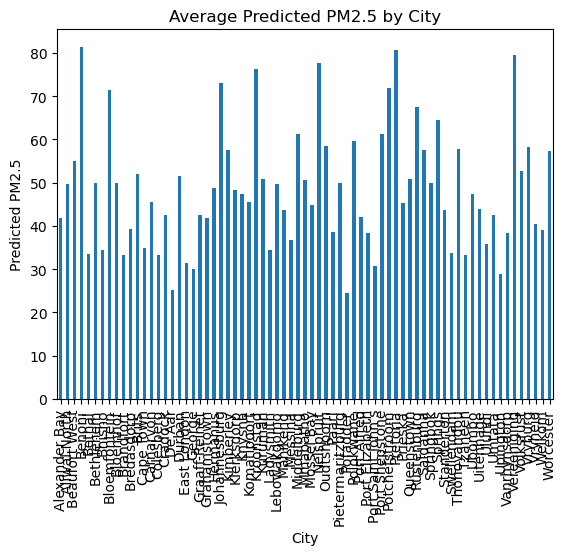

In [66]:
df.groupby('City')['Predicted_PM25'].mean().plot(kind='bar', title='Average Predicted PM2.5 by City')
plt.ylabel('Predicted PM2.5')
plt.show()


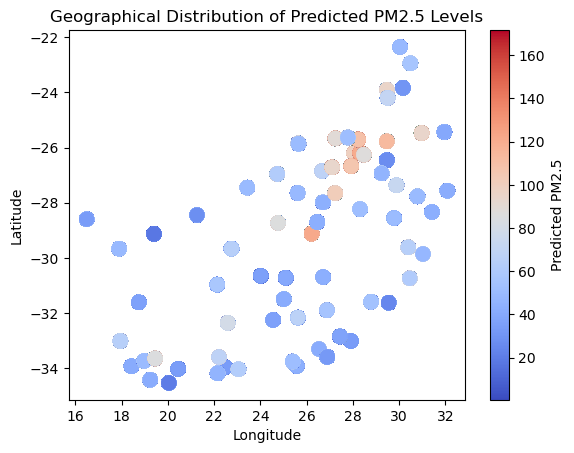

In [56]:
plt.scatter(df['Long'], df['Lat'], c=df['Predicted_PM25'], cmap='coolwarm', s=100)
plt.colorbar(label='Predicted PM2.5')
plt.title('Geographical Distribution of Predicted PM2.5 Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [69]:
df_mining = df_mines.rename(columns={'Location': 'City'})

# Merge DataFrames using Lat and Long as keys
merged_data = pd.merge(df, df_mining, how='inner', on=['City'])

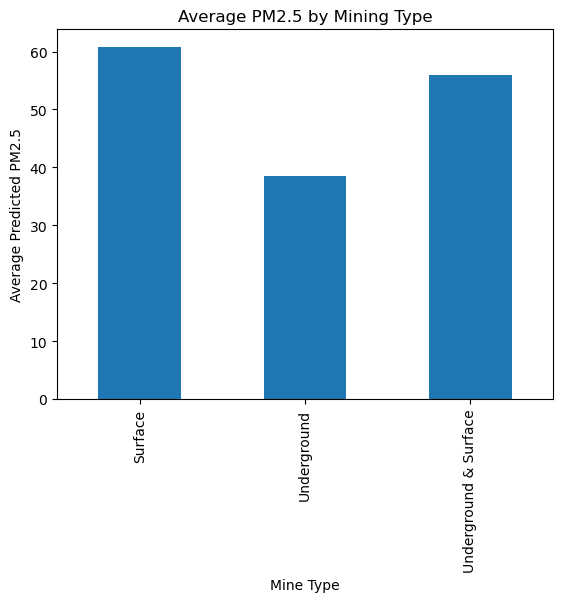

In [71]:
# Average PM2.5 by Mining Type
avg_pm25_by_mining_type = merged_data.groupby('Mine Type')['Predicted_PM25'].mean()
avg_pm25_by_mining_type.plot(kind='bar', title='Average PM2.5 by Mining Type')
plt.ylabel('Average Predicted PM2.5')
plt.show()


In [73]:
merged_data.shape


(11580, 17)

In [72]:
merged_data.head()

City       Date        Lat       Long  Predicted_PM25  \
0  Vereeniging 2019-01-01 -26.673133  27.926147       65.882715   
1  Vereeniging 2019-01-02 -26.673133  27.926147       68.498894   
2  Vereeniging 2019-01-03 -26.673133  27.926147       57.741677   
3  Vereeniging 2019-01-04 -26.673133  27.926147       58.251099   
4  Vereeniging 2019-01-05 -26.673133  27.926147       52.005960   

   pop_density2010_5000_max           Mine Name Mine Type Mining Method  \
0                3863.74585  New Vaal Coal Mine   Surface      Open Pit   
1                3863.74585  New Vaal Coal Mine   Surface      Open Pit   
2                3863.74585  New Vaal Coal Mine   Surface      Open Pit   
3                3863.74585  New Vaal Coal Mine   Surface      Open Pit   
4                3863.74585  New Vaal Coal Mine   Surface      Open Pit   

    Coal Type Coal Grade Opening Year Prefecture, District State, Province  \
0  Bituminous    Thermal         1985          Fezile Dabi      Free State   
1  Bituminous    Thermal         1985          Fezile Dabi      Free State   
2  Bituminous    Thermal         1985          Fezile Dabi      Free State   
3  Bituminous    Thermal         1985          Fezile Dabi      Free State   
4  Bituminous    Thermal         1985          Fezile Dabi      Free State   

    Latitude  Longitude Coal Plant, Steel Plant, Terminal  
0 -26.720357  27.959781             Lethabo Power Station  
1 -26.720357  27.959781             Lethabo Power Station  
2 -26.720357  27.959781             Lethabo Power Station  
3 -26.720357  27.959781             Lethabo Power Station  
4 -26.720357  27.959781             Lethabo Power Station

In [75]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11580 entries, 0 to 11579
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   City                               11580 non-null  object        
 1   Date                               11580 non-null  datetime64[ns]
 2   Lat                                11580 non-null  float64       
 3   Long                               11580 non-null  float64       
 4   Predicted_PM25                     11580 non-null  float64       
 5   pop_density2010_5000_max           11580 non-null  float64       
 6   Mine Name                          11580 non-null  object        
 7   Mine Type                          11580 non-null  object        
 8   Mining Method                      11580 non-null  object        
 9   Coal Type                          11580 non-null  object        
 10  Coal Grade                        

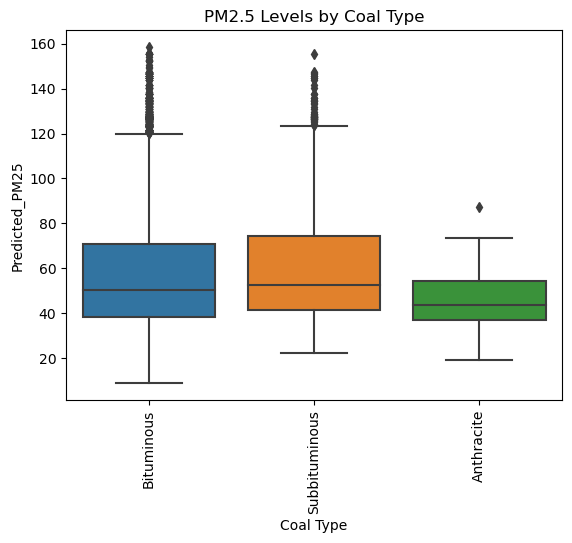

In [77]:
# Boxplot: PM2.5 levels by Coal Type
sns.boxplot(x='Coal Type', y='Predicted_PM25', data=merged_data)
plt.title('PM2.5 Levels by Coal Type')
plt.xticks(rotation=90)  # Rotate for readability
plt.show()


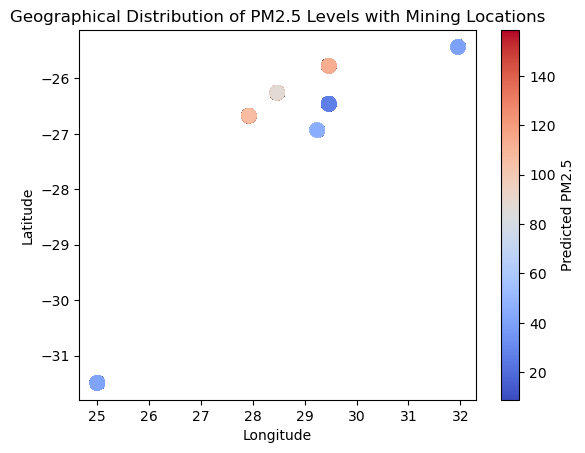

In [79]:
plt.scatter(merged_data['Long'], merged_data['Lat'], c=merged_data['Predicted_PM25'], cmap='coolwarm', s=100)
plt.colorbar(label='Predicted PM2.5')
plt.title('Geographical Distribution of PM2.5 Levels with Mining Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


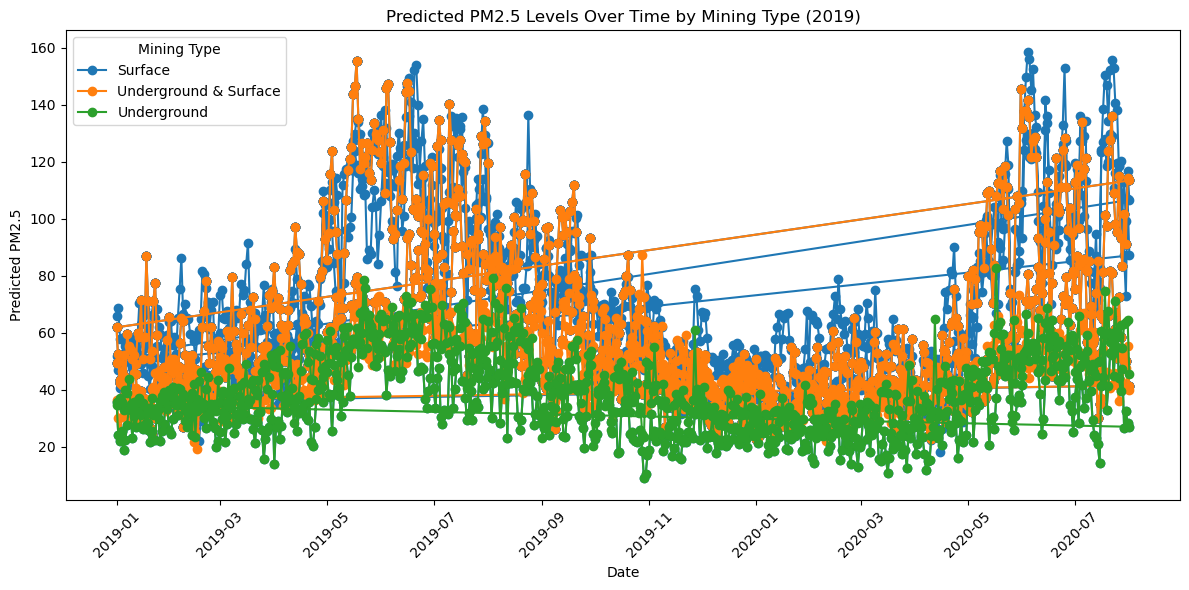

In [83]:
plt.figure(figsize=(12, 6))
for mining_type in merged_data['Mine Type'].unique():
    subset = merged_data[merged_data['Mine Type'] == mining_type]
    plt.plot(subset['Date'], subset['Predicted_PM25'], marker='o', label=mining_type)

plt.title('Predicted PM2.5 Levels Over Time by Mining Type (2019)')
plt.xlabel('Date')
plt.ylabel('Predicted PM2.5')
plt.xticks(rotation=45)
plt.legend(title='Mining Type')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


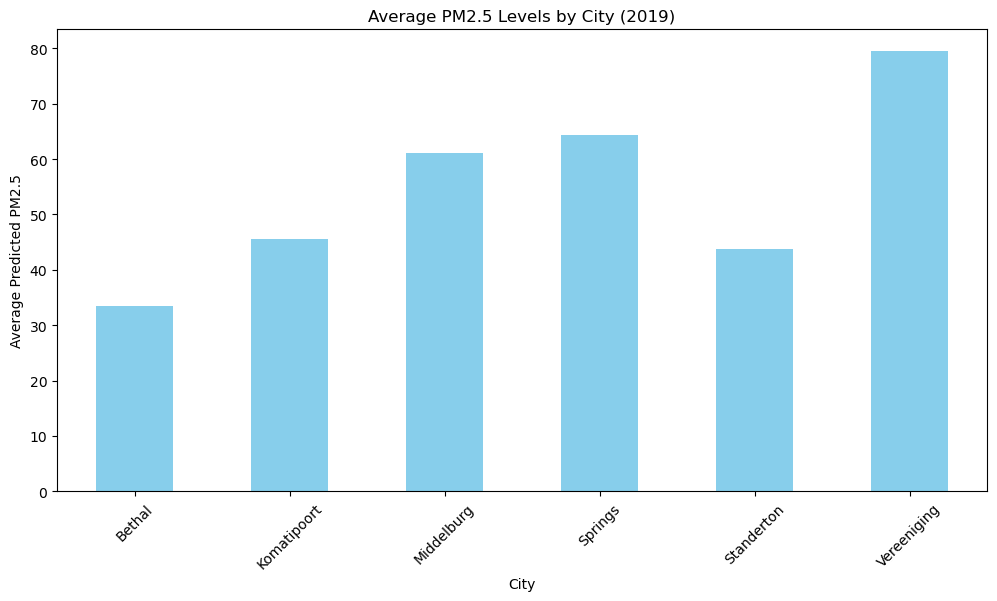

In [82]:
avg_pm25_by_city = merged_data.groupby('City')['Predicted_PM25'].mean()

plt.figure(figsize=(12, 6))
avg_pm25_by_city.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by City (2019)')
plt.xlabel('City')
plt.ylabel('Average Predicted PM2.5')
plt.xticks(rotation=45)
plt.show()


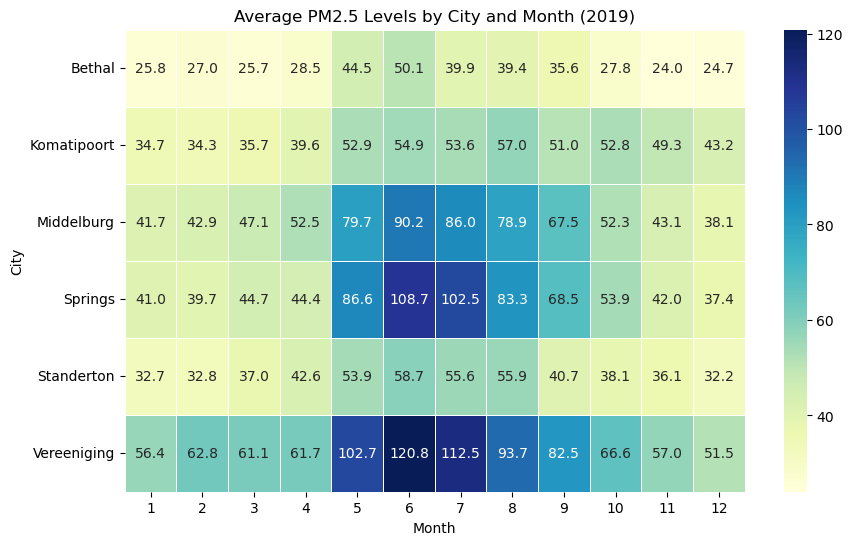

In [84]:
# First, make sure your 'Date' is in datetime format and extract month
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Month'] = merged_data['Date'].dt.month

# Create a pivot table
heatmap_data = merged_data.pivot_table(values='Predicted_PM25', index='City', columns='Month', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average PM2.5 Levels by City and Month (2019)')
plt.xlabel('Month')
plt.ylabel('City')
plt.show()


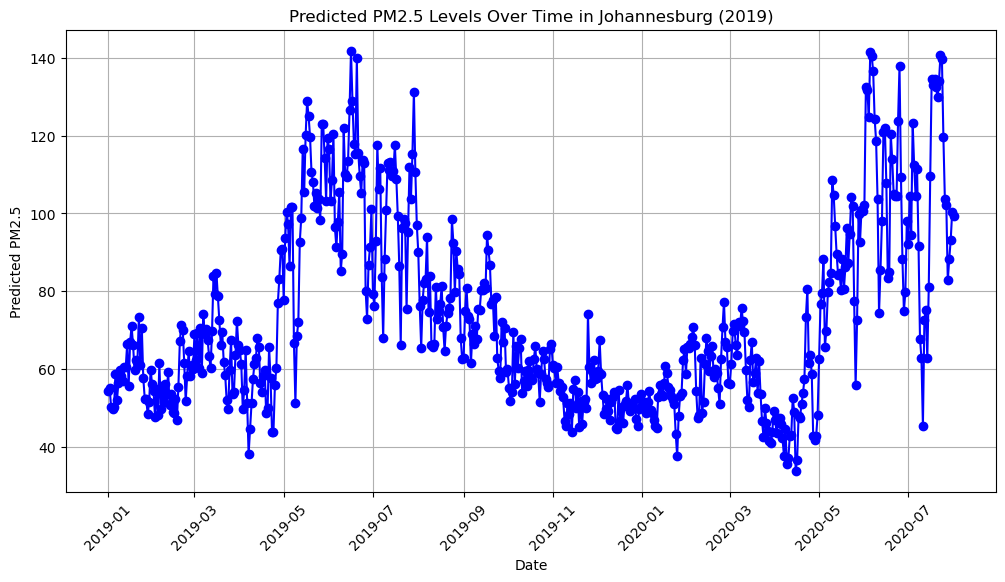

In [86]:
# Filter data for Johannesburg
johannesburg_data =df[df['City'] == 'Johannesburg']

plt.figure(figsize=(12, 6))
plt.plot(johannesburg_data['Date'], johannesburg_data['Predicted_PM25'], marker='o', color='blue')
plt.title('Predicted PM2.5 Levels Over Time in Johannesburg (2019)')
plt.xlabel('Date')
plt.ylabel('Predicted PM2.5')
plt.xticks(rotation=45)
plt.grid()
plt.show()


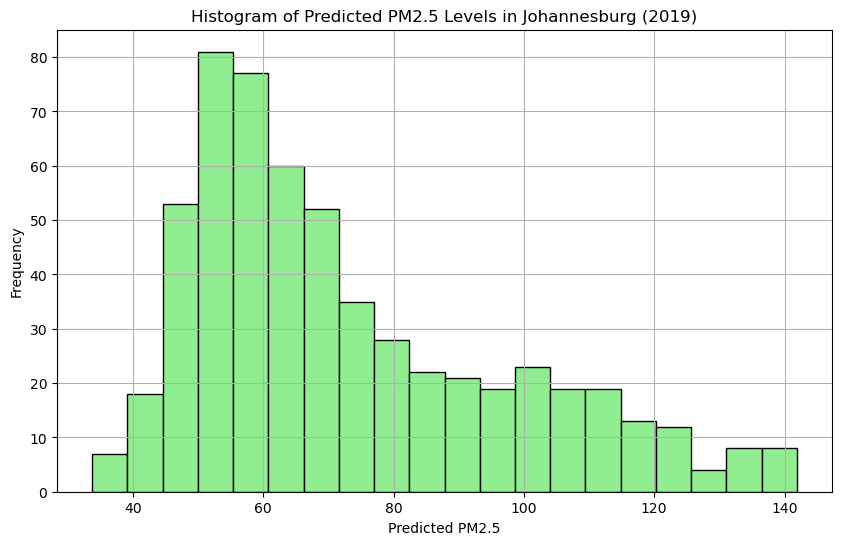

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(johannesburg_data['Predicted_PM25'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Predicted PM2.5 Levels in Johannesburg (2019)')
plt.xlabel('Predicted PM2.5')
plt.ylabel('Frequency')
plt.grid()
plt.show()


C:\Users\pales\AppData\Local\Temp\ipykernel_12188\2068059001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johannesburg_data['Month'] = johannesburg_data['Date'].dt.month


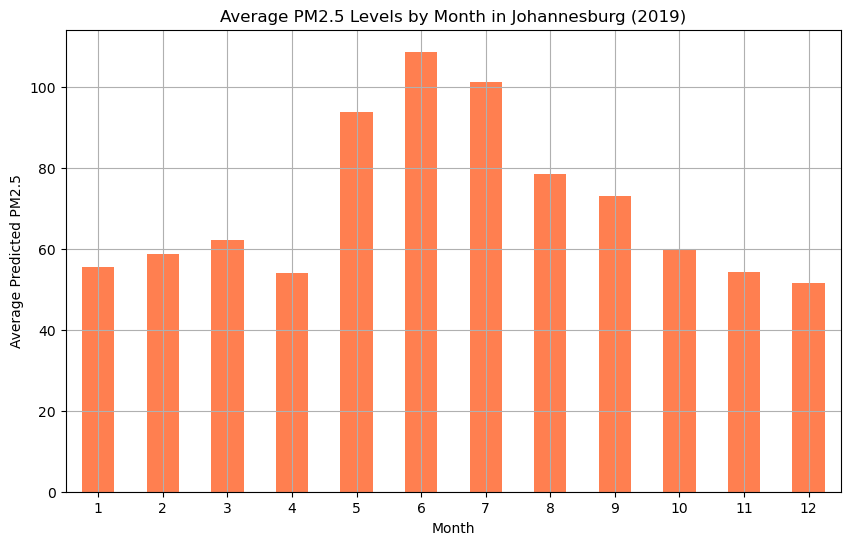

In [88]:
# Extract month from the date
johannesburg_data['Month'] = johannesburg_data['Date'].dt.month

# Calculate average PM2.5 by month
avg_pm25_by_month = johannesburg_data.groupby('Month')['Predicted_PM25'].mean()

plt.figure(figsize=(10, 6))
avg_pm25_by_month.plot(kind='bar', color='coral')
plt.title('Average PM2.5 Levels by Month in Johannesburg (2019)')
plt.xlabel('Month')
plt.ylabel('Average Predicted PM2.5')
plt.xticks(rotation=0)  # Rotate month labels for clarity
plt.grid()
plt.show()


In [91]:
df_mines['State, Province'].unique()

array(['Mpumalanga', 'Limpopo', 'Free State', 'Gauteng', 'KwaZulu-Natal'],
      dtype=object)

In [98]:
mpumalanga_mines = df_mines[df_mines['State, Province'] == 'Mpumalanga']

# Display the mine types in Gauteng
mine_types_in_gauteng = mpumalanga_mines['Mine Type'].unique()
print("Mine Types in Gauteng:", mine_types_in_gauteng)

Mine Types in Gauteng: ['Surface' 'Underground' 'Underground & Surface']


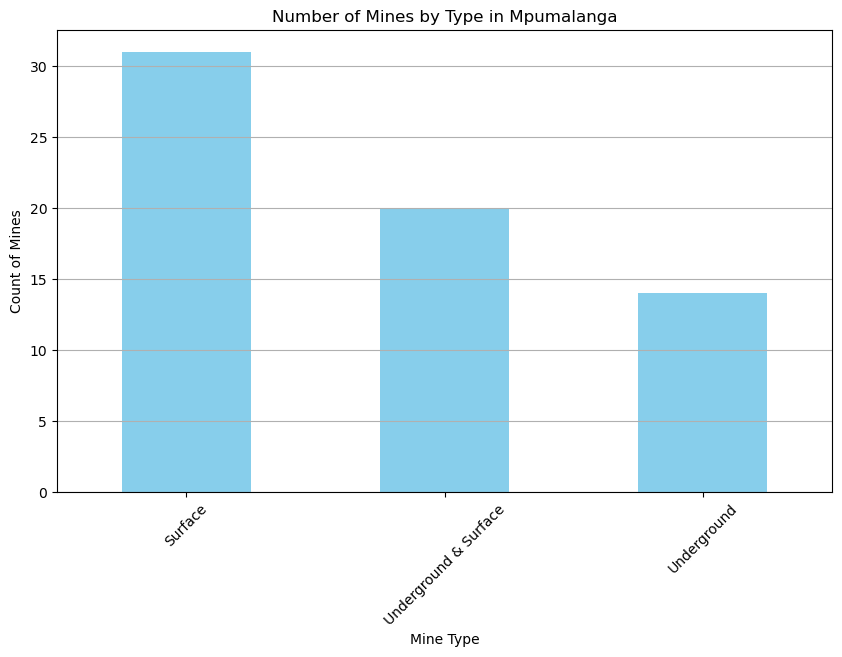

In [99]:
mine_type_counts_mpumalanga = mpumalanga_mines['Mine Type'].value_counts()

plt.figure(figsize=(10, 6))
mine_type_counts_mpumalanga.plot(kind='bar', color='skyblue')
plt.title('Number of Mines by Type in Mpumalanga')
plt.xlabel('Mine Type')
plt.ylabel('Count of Mines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

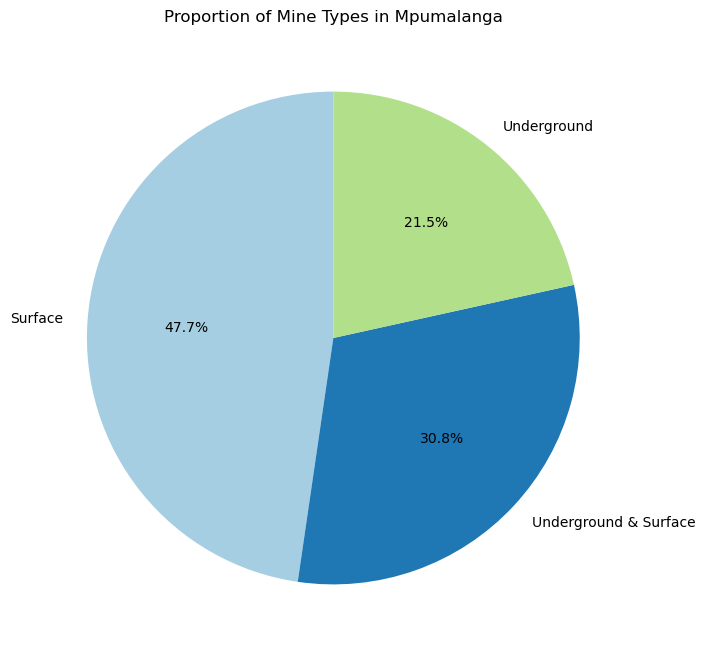

In [100]:
plt.figure(figsize=(8, 8))
mine_type_counts_mpumalanga.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Mine Types in Mpumalanga')
plt.ylabel('')  # Hide the y-label
plt.show()


In [103]:

from folium.plugins import HeatMap

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in mpumalanga_mines.iterrows()]

# Create a base map
mpumalanga_map = folium.Map(location=[-26.0, 29.0], zoom_start=8)

# Create a heatmap layer
HeatMap(heat_data).add_to(mpumalanga_map)

# Display the map
mpumalanga_map.save('mpumalanga_mine_heatmap.html')


In [108]:
# Assuming your city data is in a DataFrame called `city_data`
mpumalanga_cities = ['Mbombela', 'Middelburg', 'Bethal', 'Standerton', 
                     'Komatipoort', 'Volksrust']

# Filter city data for Mpumalanga cities
mpumalanga_pm25_data = df[df['City'].isin(mpumalanga_cities)]


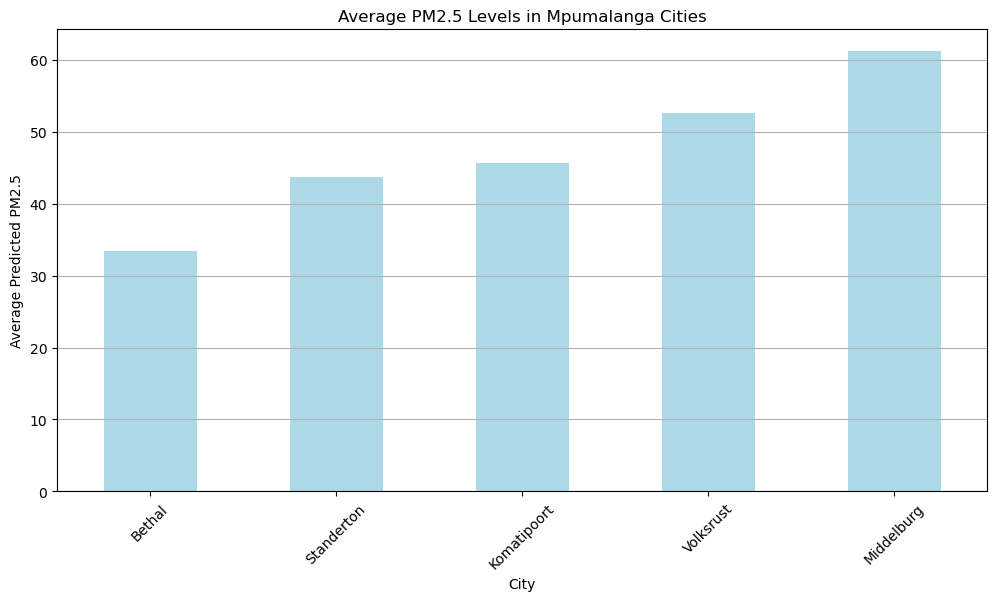

In [109]:
plt.figure(figsize=(12, 6))
pm25_by_city = mpumalanga_pm25_data.groupby('City')['Predicted_PM25'].mean().sort_values()
pm25_by_city.plot(kind='bar', color='lightblue')
plt.title('Average PM2.5 Levels in Mpumalanga Cities')
plt.xlabel('City')
plt.ylabel('Average Predicted PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


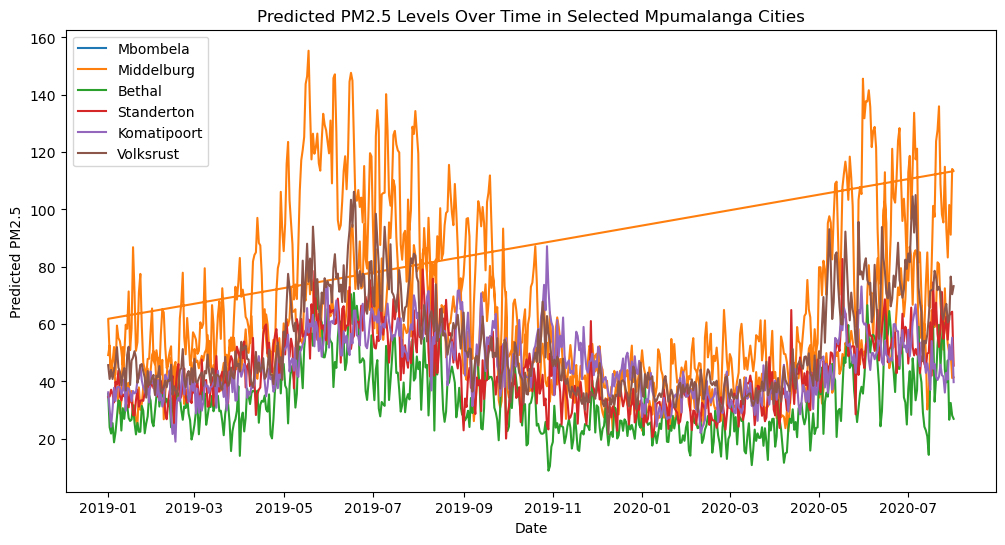

In [110]:
plt.figure(figsize=(12, 6))
for city in mpumalanga_cities:
    subset = mpumalanga_pm25_data[mpumalanga_pm25_data['City'] == city]
    plt.plot(subset['Date'], subset['Predicted_PM25'], label=city)

plt.title('Predicted PM2.5 Levels Over Time in Selected Mpumalanga Cities')
plt.xlabel('Date')
plt.ylabel('Predicted PM2.5')
plt.legend()
plt.show()


In [117]:
map_mines = folium.Map(location=[-25.5, 30.5], zoom_start=7)

In [120]:
for _, row in df_mines.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Mine Name'],  # Display the mine name in the popup
        icon=folium.Icon(color='blue')  # You can customize the marker color
    ).add_to(map_mines)

# Save and show the map
map_mines.save('mines_in_mpumalanga.html')
map_mines